<a href="https://colab.research.google.com/github/chanyoung1998/LearningML-DL/blob/main/9%EB%8B%A8%EC%9B%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import imdb
(train_input,train_target),(test_input,test_target) = imdb.load_data(num_words = 500)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [4]:
print(train_input.shape,test_input.shape)
print(len(train_input[0]))
print(len(train_input[1]))

(25000,) (25000,)
218
189


In [5]:
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [6]:
print(train_target[:20])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [7]:
from sklearn.model_selection import train_test_split

train_input,val_input,train_target,val_target = train_test_split(train_input,train_target,test_size = 0.2,random_state = 42)

In [9]:
import numpy as np
lengths = np.array([len(x) for x in train_input])
print(np.mean(lengths),np.median(lengths))

239.00925 178.0


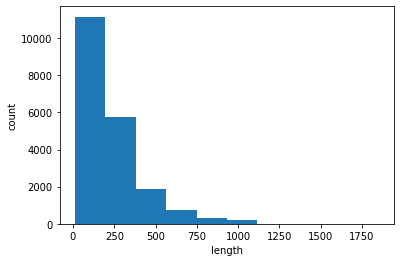

In [10]:
import matplotlib.pyplot as plt

plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('count')
plt.show()

In [13]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input,maxlen= 100)
val_seq = pad_sequences(val_input,maxlen= 100)
print(train_seq.shape)

(20000, 100)


In [15]:
from tensorflow import keras

model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8,input_shape = (100,500)))
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [16]:
train_oh = keras.utils.to_categorical(train_seq)
print(train_oh.shape)

(20000, 100, 500)


In [17]:
val_oh = keras.utils.to_categorical(val_seq)

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 8)                 4072      
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


In [20]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop,loss='binary_crossentropy',metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-siplernn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)
history = model.fit(train_oh,train_target,epochs=100,batch_size=64,validation_data=(val_oh,val_target),callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 14s 41ms/step - loss: 0.7045 - accuracy: 0.5067 - val_loss: 0.6909 - val_accuracy: 0.5322
Epoch 2/100
313/313 [==============================] - 12s 40ms/step - loss: 0.6804 - accuracy: 0.5646 - val_loss: 0.6614 - val_accuracy: 0.6130
Epoch 3/100
313/313 [==============================] - 13s 40ms/step - loss: 0.6508 - accuracy: 0.6326 - val_loss: 0.6382 - val_accuracy: 0.6500
Epoch 4/100
313/313 [==============================] - 12s 40ms/step - loss: 0.6279 - accuracy: 0.6598 - val_loss: 0.6181 - val_accuracy: 0.6694
Epoch 5/100
313/313 [==============================] - 13s 40ms/step - loss: 0.6062 - accuracy: 0.6917 - val_loss: 0.5970 - val_accuracy: 0.6956
Epoch 6/100
313/313 [==============================] - 13s 40ms/step - loss: 0.5856 - accuracy: 0.7125 - val_loss: 0.5795 - val_accuracy: 0.7130
Epoch 7/100
313/313 [==============================] - 13s 40ms/step - loss: 0.5626 - accuracy: 0.7371 - val_loss: 0.5627 - val_ac

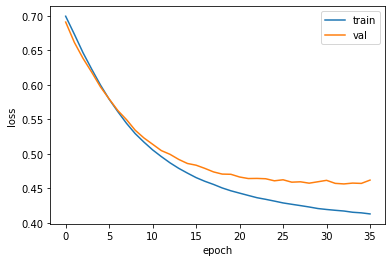

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [22]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500,16,input_length=100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1,activation='sigmoid'))
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           8000      
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 8)                 200       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 8,209
Trainable params: 8,209
Non-trainable params: 0
_________________________________________________________________


In [25]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop,loss='binary_crossentropy',metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)
history = model2.fit(train_seq,train_target,epochs=100,batch_size=64,validation_data=(val_seq,val_target),callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 8s 21ms/step - loss: 0.6957 - accuracy: 0.5072 - val_loss: 0.6889 - val_accuracy: 0.5336
Epoch 2/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6812 - accuracy: 0.5679 - val_loss: 0.6408 - val_accuracy: 0.6702
Epoch 3/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6238 - accuracy: 0.6922 - val_loss: 0.6002 - val_accuracy: 0.7168
Epoch 4/100
313/313 [==============================] - 6s 20ms/step - loss: 0.5900 - accuracy: 0.7214 - val_loss: 0.5817 - val_accuracy: 0.7290
Epoch 5/100
313/313 [==============================] - 6s 20ms/step - loss: 0.5677 - accuracy: 0.7431 - val_loss: 0.5662 - val_accuracy: 0.7344
Epoch 6/100
313/313 [==============================] - 6s 20ms/step - loss: 0.5548 - accuracy: 0.7459 - val_loss: 0.5510 - val_accuracy: 0.7416
Epoch 7/100
313/313 [==============================] - 6s 20ms/step - loss: 0.5350 - accuracy: 0.7635 - val_loss: 0.5406 - val_accuracy:

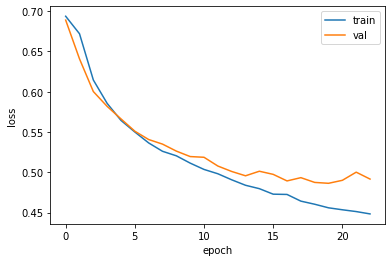

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()